# Feature selection

In [1]:
"""
f1 f2 f3 f4 ..........f50
15 relevant features u have to select from total 50 features
Feature selection is used to do this task.
bcz it will select only relevant features
whereas irrelevant , noisy features will not be selected.
"""

'\nf1 f2 f3 f4 ..........f50\n15 relevant features u have to select from total 50 features\nFeature selection is used to do this task.\nbcz it will select only relevant features\nwhereas irrelevant , noisy features will not be selected.\n'

In [2]:
# feature selection
# feature selection we select most important features
# Supervised learning algorithms
    # filter method
    # wrapper method
    # feature imporatance method

### https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection

In [3]:
# why feature selection is imporatant?
# Ans: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('mobile_data.csv.csv')

In [6]:
df.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2


In [7]:
df.shape

(2000, 21)

In [8]:
# target
df.price_range.unique()

array([1, 2, 3, 0], dtype=int64)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [11]:
# check duplicate records
df.duplicated().sum()

0

In [12]:
# Create input + output segment
x = df.iloc[:,:-1]  #skip price_range column

In [13]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [14]:
y = df['price_range']
y[:3]

0    1
1    2
2    2
Name: price_range, dtype: int64

In [15]:
# check data is balanced or not
y.value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

## Create a ML model to predict price range of a mobile phone on the basis of input features

https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

# information gain

In [16]:
#from sklearn.feature_selection import mutual_info_regression  # for regression problem
from sklearn.feature_selection import mutual_info_classif

In [17]:
# supply input and output
score = mutual_info_classif(x,y)
# model will return mutual_info score

In [18]:
score

array([3.08923478e-02, 0.00000000e+00, 0.00000000e+00, 3.27954186e-04,
       7.34795414e-03, 4.98830155e-03, 1.78272670e-02, 5.81225925e-03,
       4.22944504e-03, 0.00000000e+00, 0.00000000e+00, 3.26267064e-02,
       2.20610355e-02, 8.46551948e-01, 0.00000000e+00, 3.46773962e-02,
       5.12453598e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [19]:
len(score) # Number of features means len of x.columns (inputs)

20

In [20]:
score # score is  a mutual_info_score for 20 Features

array([3.08923478e-02, 0.00000000e+00, 0.00000000e+00, 3.27954186e-04,
       7.34795414e-03, 4.98830155e-03, 1.78272670e-02, 5.81225925e-03,
       4.22944504e-03, 0.00000000e+00, 0.00000000e+00, 3.26267064e-02,
       2.20610355e-02, 8.46551948e-01, 0.00000000e+00, 3.46773962e-02,
       5.12453598e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [21]:
imp_fea = pd.DataFrame(score,columns=['scores'])

In [22]:
imp_fea

,scores
0,0.030892
1,0.000000
2,0.000000
3,0.000328
4,0.007348
5,0.004988
6,0.017827
7,0.005812
8,0.004229
9,0.000000


In [23]:
df_columns = pd.DataFrame(df.columns,columns=['features'])
df_columns

,features
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc
5,four_g
6,int_memory
7,m_dep
8,mobile_wt
9,n_cores


In [24]:
new_feat = pd.concat([imp_fea,df_columns],axis = 1)

In [25]:
new_feat

,scores,features
0,0.030892,battery_power
1,0.000000,blue
2,0.000000,clock_speed
3,0.000328,dual_sim
4,0.007348,fc
5,0.004988,four_g
6,0.017827,int_memory
7,0.005812,m_dep
8,0.004229,mobile_wt
9,0.000000,n_cores


In [26]:
# lets select only 10 columns outof 20 using nlargest and
#specify column name to sort
new_feat = new_feat.nlargest(10,'scores')

In [27]:
new_feat

,scores,features
13,0.846552,ram
15,0.034677,sc_w
11,0.032627,px_height
0,0.030892,battery_power
12,0.022061,px_width
6,0.017827,int_memory
4,0.007348,fc
7,0.005812,m_dep
16,0.005125,talk_time
5,0.004988,four_g


<Axes: ylabel='features'>

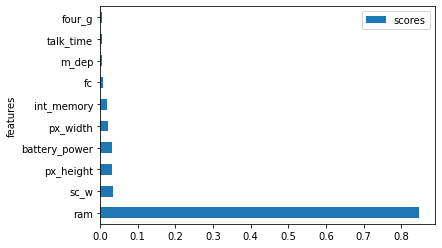

In [28]:
new_feat.plot(kind='barh',x='features',y='scores')

# SelectKBest

In [29]:
from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

In [30]:
SelectKBest?

In [31]:
x.shape

(2000, 20)

In [32]:
#SelectKBest(score_function,k).fit_transform(input,output)
X_new = SelectKBest(chi2, k=10).fit_transform(x, y)

In [33]:
X_new.shape

(2000, 10)

In [34]:
pd.DataFrame(X_new)

,0,1,2,3,4,5,6,7,8,9
0,842.0,1.0,7.0,188.0,20.0,756.0,2549.0,9.0,7.0,19.0
1,1021.0,0.0,53.0,136.0,905.0,1988.0,2631.0,17.0,3.0,7.0
2,563.0,2.0,41.0,145.0,1263.0,1716.0,2603.0,11.0,2.0,9.0
3,615.0,0.0,10.0,131.0,1216.0,1786.0,2769.0,16.0,8.0,11.0
4,1821.0,13.0,44.0,141.0,1208.0,1212.0,1411.0,8.0,2.0,15.0
...,...,...,...,...,...,...,...,...,...,...
1995,794.0,0.0,2.0,106.0,1222.0,1890.0,668.0,13.0,4.0,19.0
1996,1965.0,0.0,39.0,187.0,915.0,1965.0,2032.0,11.0,10.0,16.0
1997,1911.0,1.0,36.0,108.0,868.0,1632.0,3057.0,9.0,1.0,5.0
1998,1512.0,4.0,46.0,145.0,336.0,670.0,869.0,18.0,10.0,19.0


In [35]:
feat_imp = SelectKBest(k = 10)
#feat_imp = SelectKBest(k = 10,score_function='mutual_info_classif')

In [36]:
feat_imp.fit(x,y)

SelectKBest()

In [37]:
feat_imp.n_features_in_

20

In [38]:
feat_imp.scores_

array([3.15981575e+01, 4.76767709e-01, 4.93707801e-01, 4.28239286e-01,
       7.72181960e-01, 1.05952453e+00, 2.92299608e+00, 1.50068244e+00,
       3.59431819e+00, 2.62541515e+00, 8.25446358e-01, 1.94848418e+01,
       2.26208825e+01, 3.52011082e+03, 2.22598374e+00, 1.67099983e+00,
       1.62881131e+00, 4.57319750e-01, 1.29330223e+00, 2.84940470e-01])

In [39]:
df_imp = pd.DataFrame(feat_imp.scores_,columns=['scores'])

In [40]:
df1 = pd.concat([df_imp,df_columns],axis=1)

In [41]:
df1

,scores,features
0,31.598158,battery_power
1,0.476768,blue
2,0.493708,clock_speed
3,0.428239,dual_sim
4,0.772182,fc
5,1.059525,four_g
6,2.922996,int_memory
7,1.500682,m_dep
8,3.594318,mobile_wt
9,2.625415,n_cores


In [42]:
final = df1.nlargest(10,'scores')
final

,scores,features
13,3520.110824,ram
0,31.598158,battery_power
12,22.620882,px_width
11,19.484842,px_height
8,3.594318,mobile_wt
6,2.922996,int_memory
9,2.625415,n_cores
14,2.225984,sc_h
15,1.671000,sc_w
16,1.628811,talk_time


In [43]:
new_cols = final.features.tolist()
new_cols

['ram',
 'battery_power',
 'px_width',
 'px_height',
 'mobile_wt',
 'int_memory',
 'n_cores',
 'sc_h',
 'sc_w',
 'talk_time']

In [44]:
#x.loc[:,[final.features.values]]
#x.loc[:,['blue','sc_h']]
x_new = x.loc[:,new_cols]
x_new.head(2)

,ram,battery_power,px_width,px_height,mobile_wt,int_memory,n_cores,sc_h,sc_w,talk_time
0,2549,842,756,20,188,7,2,9,7,19
1,2631,1021,1988,905,136,53,3,17,3,7


In [45]:
x.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0


In [46]:
x.shape

(2000, 20)

In [47]:
x_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ram            2000 non-null   int64
 1   battery_power  2000 non-null   int64
 2   px_width       2000 non-null   int64
 3   px_height      2000 non-null   int64
 4   mobile_wt      2000 non-null   int64
 5   int_memory     2000 non-null   int64
 6   n_cores        2000 non-null   int64
 7   sc_h           2000 non-null   int64
 8   sc_w           2000 non-null   int64
 9   talk_time      2000 non-null   int64
dtypes: int64(10)
memory usage: 156.4 KB


# correlation coef

In [48]:
df[:3]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2


In [49]:
df.corr?

<Axes: >

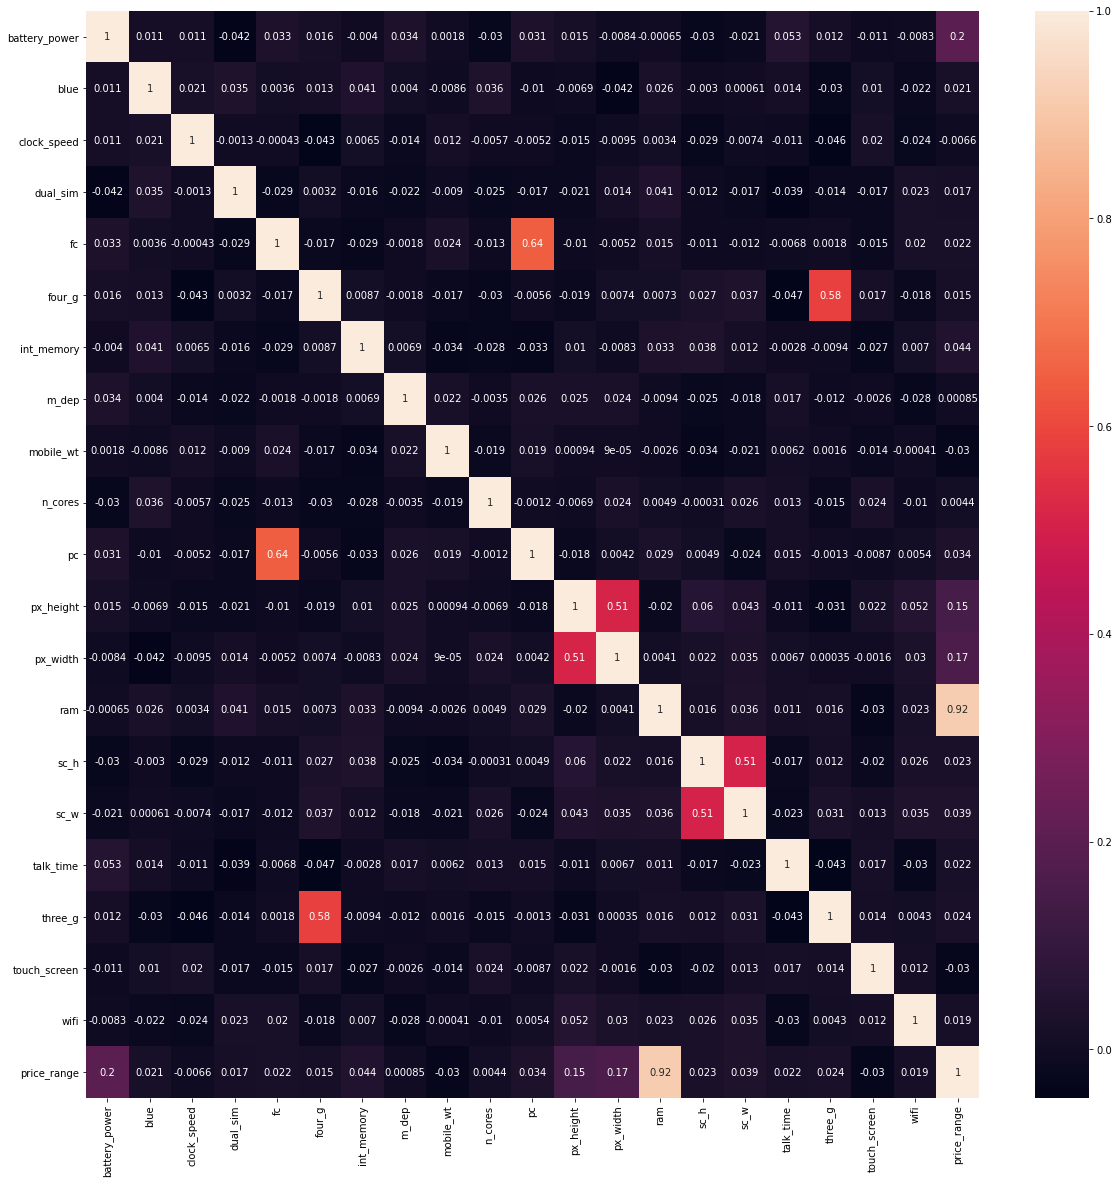

In [50]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

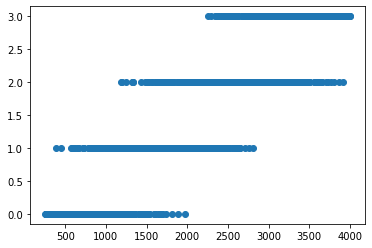

In [51]:
# ram vs price_range
plt.scatter(df.ram,df.price_range)

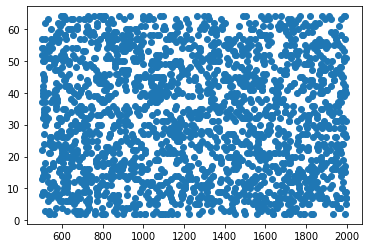

In [52]:
# battery_power vs int_mem
plt.scatter(df.battery_power,df.int_memory)

# feature importance

In [53]:
from sklearn.ensemble import ExtraTreesClassifier

In [54]:
modl = ExtraTreesClassifier()

In [55]:
# lets create x and y
x = df.drop(columns='price_range')
y = df.price_range

In [56]:
modl.fit(x,y)

ExtraTreesClassifier()

In [57]:
score = modl.feature_importances_
score

array([0.0624259 , 0.01910869, 0.03294615, 0.01936306, 0.03205177,
       0.0164095 , 0.03523077, 0.03327242, 0.03634687, 0.03328706,
       0.03277499, 0.04721765, 0.04879014, 0.39793735, 0.03378127,
       0.03291557, 0.03448038, 0.01424235, 0.01782716, 0.01959094])

In [58]:
ranked_features = pd.Series(score,index=x.columns)
ranked_features

battery_power    0.062426
blue             0.019109
clock_speed      0.032946
dual_sim         0.019363
fc               0.032052
four_g           0.016410
int_memory       0.035231
m_dep            0.033272
mobile_wt        0.036347
n_cores          0.033287
pc               0.032775
px_height        0.047218
px_width         0.048790
ram              0.397937
sc_h             0.033781
sc_w             0.032916
talk_time        0.034480
three_g          0.014242
touch_screen     0.017827
wifi             0.019591
dtype: float64

<Axes: >

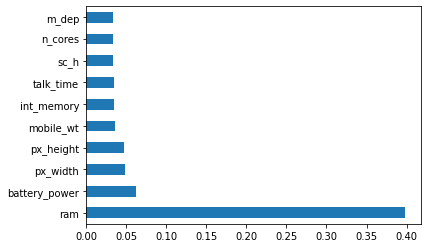

In [59]:
ranked_features.nlargest(10).plot(kind='barh')

# RFE(Recursive Feature elimination)

In [60]:
from sklearn.feature_selection import RFE

In [61]:
RFE?

In [62]:
x.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0


In [63]:
# RFE(estimator= algorithm,no_of_features_to_select)

In [64]:
from sklearn.linear_model import LogisticRegression
lr_1 = LogisticRegression()

In [65]:
rf_selector = RFE(estimator=lr_1,n_features_to_select=10)

In [66]:
rf_selector.fit(x,y)

RFE(estimator=LogisticRegression(), n_features_to_select=10)

In [67]:
out = rf_selector.support_
out

array([False, False,  True, False,  True, False,  True, False,  True,
        True,  True, False, False,  True,  True,  True,  True, False,
       False, False])

In [68]:
rf_selector.ranking_

array([ 5,  8,  1,  7,  1, 10,  1, 11,  1,  1,  1,  2,  3,  1,  1,  1,  1,
        4,  6,  9])

In [69]:
new_x = x.loc[:,out]
new_x

,clock_speed,fc,int_memory,mobile_wt,n_cores,pc,ram,sc_h,sc_w,talk_time
0,2.2,1,7,188,2,2,2549,9,7,19
1,0.5,0,53,136,3,6,2631,17,3,7
2,0.5,2,41,145,5,6,2603,11,2,9
3,2.5,0,10,131,6,9,2769,16,8,11
4,1.2,13,44,141,2,14,1411,8,2,15
...,...,...,...,...,...,...,...,...,...,...
1995,0.5,0,2,106,6,14,668,13,4,19
1996,2.6,0,39,187,4,3,2032,11,10,16
1997,0.9,1,36,108,8,3,3057,9,1,5
1998,0.9,4,46,145,5,5,869,18,10,19


In [70]:
# lets try with other estimator
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [71]:
rf_selector_2 = RFE(estimator=rf,n_features_to_select=8)

In [72]:
rf_selector_2.fit(x,y)

RFE(estimator=RandomForestClassifier(), n_features_to_select=8)

In [73]:
sp = rf_selector_2.support_
sp

array([ True, False, False, False, False, False,  True, False,  True,
       False,  True,  True,  True,  True, False, False,  True, False,
       False, False])

In [74]:
x.loc[:,sp]

,battery_power,int_memory,mobile_wt,pc,px_height,px_width,ram,talk_time
0,842,7,188,2,20,756,2549,19
1,1021,53,136,6,905,1988,2631,7
2,563,41,145,6,1263,1716,2603,9
3,615,10,131,9,1216,1786,2769,11
4,1821,44,141,14,1208,1212,1411,15
...,...,...,...,...,...,...,...,...
1995,794,2,106,14,1222,1890,668,19
1996,1965,39,187,3,915,1965,2032,16
1997,1911,36,108,3,868,1632,3057,5
1998,1512,46,145,5,336,670,869,19


In [75]:
cr = pd.read_csv('https://raw.githubusercontent.com/sap0408/mtcars/master/mtcars.csv')
cr.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [76]:
cr.model.nunique()

32

<Axes: >

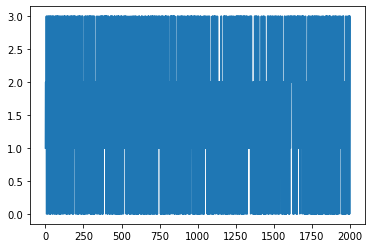

In [77]:
y.plot()

<Axes: >

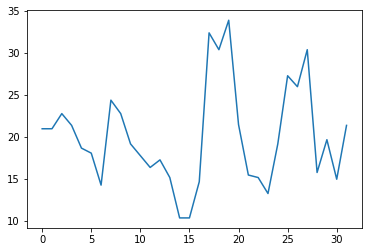

In [78]:
cr.mpg.plot()

In [79]:
# X,y separate
X = cr.iloc[:,2:]
X[:2]

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [80]:
X.shape

(32, 10)

In [81]:
y = cr.mpg
y[:3]

0    21.0
1    21.0
2    22.8
Name: mpg, dtype: float64

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
lr =  LinearRegression()

In [84]:
rf_new = RFE(estimator=lr,n_features_to_select=5)
rf_new

RFE(estimator=LinearRegression(), n_features_to_select=5)

## https://machinelearningmastery.com/rfe-feature-selection-in-python/

In [85]:
rf_new.fit(X,y)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [86]:
rf_new.n_features_

5

In [87]:
rf_new.estimator_

LinearRegression()

In [88]:
rf_new.support_

array([False, False, False,  True,  True,  True, False,  True, False,
        True])

In [89]:
rf_new.ranking_

array([4, 6, 5, 1, 1, 1, 3, 1, 2, 1])

In [90]:
rf_new.fit_transform(X,y)

array([[ 3.9  ,  2.62 , 16.46 ,  1.   ,  4.   ],
       [ 3.9  ,  2.875, 17.02 ,  1.   ,  4.   ],
       [ 3.85 ,  2.32 , 18.61 ,  1.   ,  1.   ],
       [ 3.08 ,  3.215, 19.44 ,  0.   ,  1.   ],
       [ 3.15 ,  3.44 , 17.02 ,  0.   ,  2.   ],
       [ 2.76 ,  3.46 , 20.22 ,  0.   ,  1.   ],
       [ 3.21 ,  3.57 , 15.84 ,  0.   ,  4.   ],
       [ 3.69 ,  3.19 , 20.   ,  0.   ,  2.   ],
       [ 3.92 ,  3.15 , 22.9  ,  0.   ,  2.   ],
       [ 3.92 ,  3.44 , 18.3  ,  0.   ,  4.   ],
       [ 3.92 ,  3.44 , 18.9  ,  0.   ,  4.   ],
       [ 3.07 ,  4.07 , 17.4  ,  0.   ,  3.   ],
       [ 3.07 ,  3.73 , 17.6  ,  0.   ,  3.   ],
       [ 3.07 ,  3.78 , 18.   ,  0.   ,  3.   ],
       [ 2.93 ,  5.25 , 17.98 ,  0.   ,  4.   ],
       [ 3.   ,  5.424, 17.82 ,  0.   ,  4.   ],
       [ 3.23 ,  5.345, 17.42 ,  0.   ,  4.   ],
       [ 4.08 ,  2.2  , 19.47 ,  1.   ,  1.   ],
       [ 4.93 ,  1.615, 18.52 ,  1.   ,  2.   ],
       [ 4.22 ,  1.835, 19.9  ,  1.   ,  1.   ],
       [ 3.7  ,  2.4

In [91]:
X.loc[:,rf_new.support_][:3]

,drat,wt,qsec,am,carb
0,3.90,2.620,16.46,1,4
1,3.90,2.875,17.02,1,4
2,3.85,2.320,18.61,1,1


In [92]:
# use decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

rfe_dt = RFE(estimator=dtr,n_features_to_select=5)
rfe_dt.fit(X,y)

RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)

In [93]:
X.loc[:,rfe_dt.support_][:3]

,disp,hp,wt,qsec,carb
0,160.0,110,2.620,16.46,4
1,160.0,110,2.875,17.02,4
2,108.0,93,2.320,18.61,1


In [94]:
from sklearn.feature_selection import mutual_info_regression

In [95]:
from sklearn.feature_selection import SelectKBest

In [96]:
sk = SelectKBest(score_func=mutual_info_regression,k=5)
sk

SelectKBest(k=5,
            score_func=<function mutual_info_regression at 0x000001A6372D2DC0>)

In [97]:
sk.fit(X,y)

SelectKBest(k=5,
            score_func=<function mutual_info_regression at 0x000001A6372D2DC0>)

In [98]:
sk.scores_

array([0.7836538 , 0.70980322, 0.80757101, 0.20306537, 0.79802784,
       0.        , 0.29036912, 0.20270941, 0.2005781 , 0.09597557])

In [99]:
final = pd.concat([pd.DataFrame(sk.scores_,columns=['score']),pd.DataFrame(X.columns,columns=['features'])],axis=1)
final[:]

,score,features
0,0.783654,cyl
1,0.709803,disp
2,0.807571,hp
3,0.203065,drat
4,0.798028,wt
5,0.000000,qsec
6,0.290369,vs
7,0.202709,am
8,0.200578,gear
9,0.095976,carb


In [100]:
final.nlargest(5,'score')

,score,features
2,0.807571,hp
4,0.798028,wt
0,0.783654,cyl
1,0.709803,disp
6,0.290369,vs


In [101]:
salaray= 10000 5 1000000

SyntaxError: invalid syntax (<ipython-input-101-dbd818eb99df>, line 1)

**Recursive Feature Elimination (RFE)** is a powerful feature selection technique that helps identify the most important features by recursively removing the least important ones and evaluating model performance. It is typically used with a machine learning model to help improve model efficiency, accuracy, and interpretability by reducing the number of features.

### **How Recursive Feature Elimination (RFE) Works:**

1. **Initial Model Training**: RFE begins by training a model on all available features. For example, this could be a linear regression, support vector machine (SVM), or decision tree, among others. The choice of model depends on the specific use case.

2. **Feature Ranking**: After training the model, RFE ranks the features based on their importance. The importance can be assessed using the model’s internal feature importance ranking (e.g., coefficients in linear models, or feature importance in decision trees). In the case of linear models, for instance, features with the smallest coefficients might be considered less important.

3. **Eliminate the Least Important Feature(s)**: The feature(s) deemed least important are removed from the dataset.

4. **Re-train the Model**: The model is retrained on the remaining features, and the feature importance ranking is again assessed.

5. **Repeat**: Steps 3 and 4 are repeated iteratively, removing one or more of the least important features each time. This process continues until a predefined number of features is reached (or until no further improvement is made in model performance).

6. **Final Feature Set**: The result of RFE is the set of features that remains after this iterative process—these features are considered the most useful for the model.

### **Advantages of RFE**:

1. **Improved Model Performance**: By removing irrelevant or redundant features, RFE helps reduce overfitting, which in turn improves generalization and predictive performance of the model.
   
2. **Feature Ranking**: RFE provides a ranked list of features, making it easier to understand which features are most influential in making predictions.

3. **Versatility**: RFE can be applied to any machine learning algorithm that has a way to assess feature importance. It works well with linear models, decision trees, and support vector machines (SVMs), among others.

4. **Automation**: The process of recursive elimination is automated, making it easier to identify optimal features without manual intervention.

### **Disadvantages of RFE**:

1. **Computationally Expensive**: RFE requires training a model multiple times, which can be computationally expensive and time-consuming, especially with large datasets or complex models.

2. **Model Dependency**: RFE depends on the model used to assess feature importance. Different models might rank features differently, which means the result could change based on the choice of model. 

3. **Risk of Overfitting**: If not used carefully, RFE can lead to overfitting, especially in cases where there are many irrelevant features that could be removed during the process.

4. **No Interaction Consideration**: RFE does not account for interactions between features. Some features may appear unimportant on their own but could be highly valuable in combination with other features.

### **Example Use Case in Python (using scikit-learn):**

Here’s how you can implement RFE in Python using scikit-learn:

```python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Choose a model (SVM with a linear kernel in this case)
model = SVC(kernel="linear")

# Initialize RFE and fit it to the training data
rfe = RFE(estimator=model, n_features_to_select=2)  # Select top 2 features
rfe.fit(X_train, y_train)

# Get the ranking of features
print("Feature Ranking: ", rfe.ranking_)

# Get the selected features
print("Selected Features: ", rfe.support_)

# Evaluate the model with the selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)
model.fit(X_train_rfe, y_train)
print(f"Model Accuracy with RFE Features: {model.score(X_test_rfe, y_test)}")
```

### **Key Points to Remember**:
- **Number of Features to Select**: You need to specify how many features you want to retain (i.e., `n_features_to_select`). The more features you keep, the less aggressive the feature elimination process.
- **Model Choice**: RFE works well with models that provide feature importance, such as linear models (logistic regression, SVM with linear kernel) and tree-based models (decision trees, random forests).

### **Use Cases for RFE**:
- **Dimensionality Reduction**: When you have a large number of features and want to reduce complexity without losing important information.
- **Improved Model Interpretability**: By selecting a smaller number of important features, RFE makes the model more interpretable, which is especially important in areas like healthcare or finance.
- **Better Generalization**: By removing irrelevant or noisy features, RFE reduces overfitting and improves the model's ability to generalize to unseen data.

In summary, Recursive Feature Elimination (RFE) is an effective feature selection technique for improving model performance and interpretability. However, it can be computationally expensive, so it’s important to consider the trade-offs and apply it wisely.

Feature selection is a crucial step in the machine learning pipeline, aimed at improving model performance, reducing overfitting, and making the model easier to interpret. There are several techniques available for feature selection, each with its own strengths. Here are five important feature selection techniques explained in detail:

1. Filter Methods
Filter methods assess the relevance of features by their intrinsic properties, independent of any machine learning model. These methods use statistical measures to score and rank features, and then select the most relevant ones.

Common Techniques:

Chi-squared Test: Measures dependence between feature and target variable.
Correlation Coefficient: Measures the relationship between two variables.
Mutual Information: Measures the amount of information shared between feature and target variable.
Advantages:

Fast and computationally inexpensive.
Easy to implement.
Does not require a machine learning model.
Disadvantages:

Does not account for feature interactions.
Might ignore features that are important in combination with others.
2. Wrapper Methods
Wrapper methods evaluate feature subsets by training a machine learning model and assessing its performance. This process can be computationally expensive because it requires repeated model training.

Common Techniques:

Forward Selection: Starts with no features and adds features one by one based on model performance.
Backward Elimination: Starts with all features and removes the least useful feature at each step.
Recursive Feature Elimination (RFE): Recursively removes features based on model performance, starting with all features and systematically eliminating the least important ones.
Advantages:

Accounts for interactions between features.
Tends to select features that are most useful for the specific model used.
Disadvantages:

Computationally expensive.
May overfit the model, especially with small datasets.
3. Embedded Methods
Embedded methods perform feature selection during the model training process. These techniques combine the strengths of both filter and wrapper methods and are typically used in models like decision trees or regularized linear models.

Common Techniques:

Lasso (L1 Regularization): Adds a penalty to the loss function based on the absolute value of the feature coefficients, which encourages sparsity in feature selection.
Decision Trees: Use the feature importance derived from tree-building algorithms to select the most significant features.
Random Forest: A type of ensemble method that computes feature importance by averaging the importance scores across all trees in the forest.
Advantages:

More efficient than wrapper methods.
Incorporates feature selection during model training, making it suitable for large datasets.
Disadvantages:

Can still be computationally expensive for very large datasets.
Dependent on the choice of model (e.g., lasso works well with linear models but may not be as effective with other models).
4. Principal Component Analysis (PCA)
PCA is a dimensionality reduction technique rather than traditional feature selection. It transforms the original features into a new set of features (principal components) that capture the most variance in the data.

How It Works:

PCA identifies a set of orthogonal axes (principal components) that maximize the variance of the data.
The features are then projected onto these new axes, and components with lower variance are discarded, reducing the feature space.
Advantages:

Effective for reducing dimensionality while retaining most of the variance.
Helps with visualization and mitigating multicollinearity.
Disadvantages:

Does not preserve original feature interpretability (the principal components are combinations of original features).
Can be computationally expensive for very high-dimensional data.
5. Genetic Algorithms
Genetic algorithms are an optimization technique inspired by natural selection. They are used for feature selection by simulating the process of evolution, iteratively selecting and combining the best performing feature subsets.

How It Works:

A population of feature subsets is initialized.
Each subset is evaluated based on its performance using a chosen evaluation metric (e.g., accuracy of a classifier).
The best subsets are selected for reproduction (crossovers) and mutation (random changes) to form new subsets, and the process repeats.
Advantages:

Can explore large search spaces and discover non-obvious feature subsets.
Suitable for complex problems with many features and feature interactions.
Disadvantages:

Computationally expensive.
Requires careful tuning of genetic algorithm parameters (e.g., population size, crossover rate).
Each of these methods has its pros and cons, and the choice of which to use depends on factors like the nature of the data, the computational resources available, and the specific goals of the analysis. Often, a combination of techniques works best to achieve optimal feature selection.

In [124]:
c= sns.load_dataset('car_crashes')

In [105]:
c.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [117]:
X=c.iloc[:,1:6]

In [118]:
X

,speeding,alcohol,not_distracted,no_previous,ins_premium
0,7.332,5.640,18.048,15.040,784.55
1,7.421,4.525,16.290,17.014,1053.48
2,6.510,5.208,15.624,17.856,899.47
3,4.032,5.824,21.056,21.280,827.34
4,4.200,3.360,10.920,10.680,878.41
5,5.032,3.808,10.744,12.920,835.50
6,4.968,3.888,9.396,8.856,1068.73
7,6.156,4.860,14.094,16.038,1137.87
8,2.006,1.593,5.900,5.900,1273.89
9,3.759,5.191,16.468,16.826,1160.13


In [123]:
c.abbrev.value_counts

<bound method IndexOpsMixin.value_counts of 0     AL
1     AK
2     AZ
3     AR
4     CA
5     CO
6     CT
7     DE
8     DC
9     FL
10    GA
11    HI
12    ID
13    IL
14    IN
15    IA
16    KS
17    KY
18    LA
19    ME
20    MD
21    MA
22    MI
23    MN
24    MS
25    MO
26    MT
27    NE
28    NV
29    NH
30    NJ
31    NM
32    NY
33    NC
34    ND
35    OH
36    OK
37    OR
38    PA
39    RI
40    SC
41    SD
42    TN
43    TX
44    UT
45    VT
46    VA
47    WA
48    WV
49    WI
50    WY
Name: abbrev, dtype: object>

In [119]:
y=c["total"]

In [120]:
y

0     18.8
1     18.1
2     18.6
3     22.4
4     12.0
5     13.6
6     10.8
7     16.2
8      5.9
9     17.9
10    15.6
11    17.5
12    15.3
13    12.8
14    14.5
15    15.7
16    17.8
17    21.4
18    20.5
19    15.1
20    12.5
21     8.2
22    14.1
23     9.6
24    17.6
25    16.1
26    21.4
27    14.9
28    14.7
29    11.6
30    11.2
31    18.4
32    12.3
33    16.8
34    23.9
35    14.1
36    19.9
37    12.8
38    18.2
39    11.1
40    23.9
41    19.4
42    19.5
43    19.4
44    11.3
45    13.6
46    12.7
47    10.6
48    23.8
49    13.8
50    17.4
Name: total, dtype: float64

In [122]:
from sklearn.feature_selection import mutual_info_regression
score = mutual_info_regression()

ValueError: Unknown label type: 'continuous'